In [2]:
import os
import pandas as pd
import numpy as np
import warnings

country_list=['AT','BE','ES','FR','GR','HU','IT','LU','MT','PT','RO','SE','SK']
columns = ['source', 'country', 'year', 'count', 'complete_count']
summary = pd.DataFrame(columns=columns)
json_file_path='C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\Completeness_Data\\summary.csv'
if os.path.exists(json_file_path):
    try:
        summary = pd.read_csv(json_file_path)
    except Exception as e:
            print(f"Error reading CSV: {e}")
            summary=pd.DataFrame(columns)
else:
    print(f"CSV file does not exist.")
    summary=pd.DataFrame(columns)

In [2]:
# Replace 'opentender_path' with the path to your directory containing the folders
summary = summary[summary['source'] != 'opentender']
opentender_path = 'C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\OpenTender'

# Get folder names in the directory
folders = [folder for folder in os.listdir(opentender_path) if os.path.isdir(os.path.join(opentender_path, folder))]


for folder in folders:
    folder_path = os.path.join(opentender_path, folder)
    file_name = folder.replace("csv", "")
    print('Loading OpenTender '+folder+'...')
    for year in range(2009,2023):#2023
        json_file_path = os.path.join(folder_path, f"{file_name}{year}.csv")

        # Check if the JSON file exists for the specific year in the folder
        if os.path.exists(json_file_path):
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore") #Ignore Warnings
                    # Read JSON file into a Pandas DataFrame
                    df = pd.read_csv(json_file_path, on_bad_lines='skip',sep=';')
                
                print(str(year), end='-')
                row_data = {
                    'source' : 'opentender',
                    'country' : folder[5:7],
                    'year' : year,
                    'count' : df.shape[0],
                    'complete_count' : df[(df['tender_mainCpv'].notnull()) & (df['tender_finalPrice_currency'].notnull())].shape[0]
                }  
                summary = pd.concat([summary, pd.DataFrame([row_data])], ignore_index=True)
            except Exception as e:
                print(f"Error reading CSV in {folder}: {e}")
        else:
            print(f"CSV file for year {year} does not exist.")
    print('')   
    
print('Load complete')

Loading OpenTender data-at-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-be-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-es-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-fr-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-gr-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-hu-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-it-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-lu-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-mt-csv...
2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-
Loading OpenTender data-pt-csv...
2009-2010-2011-2012-2

In [5]:
summary = summary[summary['source'] != 'ted']
ted_path = 'C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\TED'
for year in range(2011,2022):
        print('Loading TED '+str(year)+'...')
        file_name='TED_AWARD_'
        json_file_path = os.path.join(ted_path, f"{file_name}{year}.csv")

        # Check if the JSON file exists for the specific year in the folder
        if os.path.exists(json_file_path):
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore") #Ignore Warnings
                    # Read JSON file into a Pandas DataFrame
                    df = pd.read_csv(json_file_path, on_bad_lines='skip',sep=',')
                for country in [c for c in df['ISO_COUNTRY_CODE'].unique() if c in country_list]:
                    # print(country)
                    filtered_df = df[df['ISO_COUNTRY_CODE'] == country]
                    row_data = {
                        'source' : 'ted',
                        'country' : country.lower(),
                        'year' : year,
                        'count' : filtered_df.shape[0],
                        'complete_count' : filtered_df[(filtered_df['CPV'].notnull()) & (filtered_df['AWARD_VALUE_EURO'].notnull())].shape[0]
                    }  
                    summary = pd.concat([summary, pd.DataFrame([row_data])], ignore_index=True)

            except Exception as e:
                print(f"Error reading CSV in {folder}: {e}")
        else:
            print(f"CSV file for year {year} does not exist.")
        
print('Load complete')

Loading TED 2011...
Loading TED 2012...
Loading TED 2013...
Loading TED 2014...
Loading TED 2015...
Loading TED 2016...
Loading TED 2017...
Loading TED 2018...
Loading TED 2019...
Loading TED 2020...
Loading TED 2021...
Load complete


In [20]:
display(summary[summary['source']=='swedish_database'])

,source,country,year,count,complete_count
325,swedish_database,se,2021,1837,1837
326,swedish_database,se,2022,1845,1845


In [7]:
summary = summary[summary['source'] != 'swedish_database']
sedata_path = 'C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\SE_Database'
file_name='upphandlings'
json_file_path = os.path.join(sedata_path, f"{file_name}.csv")
if os.path.exists(json_file_path):
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore") #Ignore Warnings
            # Read JSON file into a Pandas DataFrame
            df = pd.read_csv(json_file_path, on_bad_lines='skip',sep=';')
        for year in range(2021,2023):
            filtered_df = df[df['År'] == year]
            row_data = {
                                    'source' : 'swedish_database',
                                    'country' : 'se',
                                    'year' : year,
                                    'count' : filtered_df.shape[0],
                                    'complete_count' : filtered_df[(filtered_df['Huvudsaklig CPV-kod'].notnull()) & (filtered_df['Kontrakterat värde, Summa'].notnull())].shape[0]
                                }
            summary = pd.concat([summary, pd.DataFrame([row_data])], ignore_index=True)

    except Exception as e:
        print(f"Error reading CSV in {folder}: {e}")
else:
    print(f"CSV file for year {year} does not exist.")
        
print('Load complete')

Load complete


In [6]:
summary.to_csv('C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\Completeness_Data\\summary.csv', index=False)

C:\Users\afont\AppData\Local\Temp\ipykernel_4104\2766177312.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


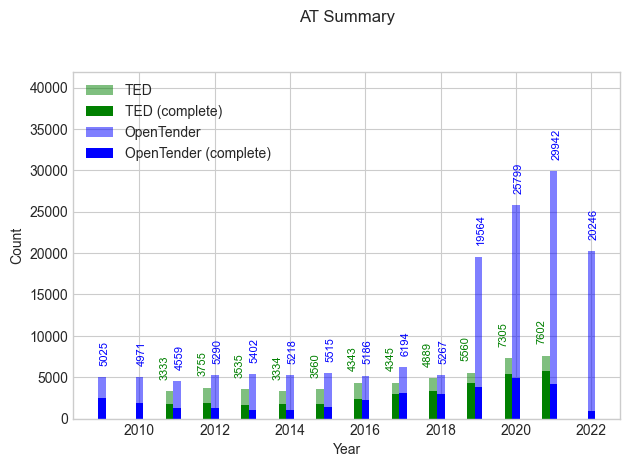

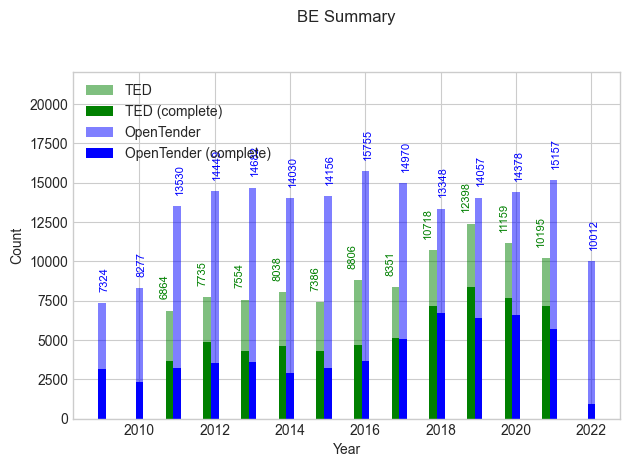

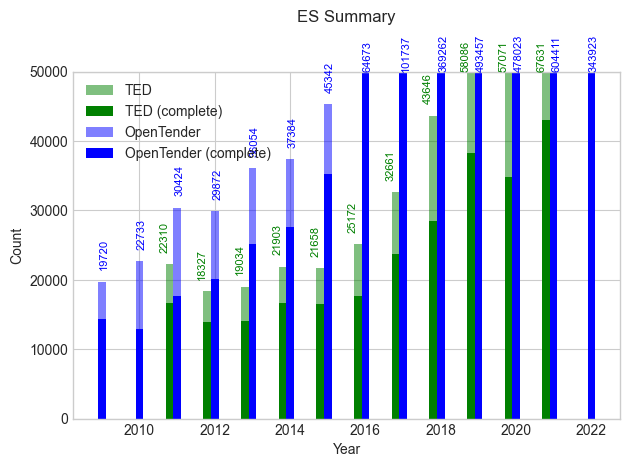

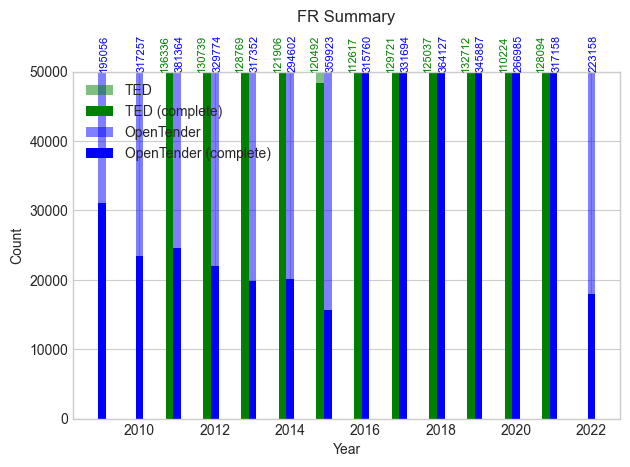

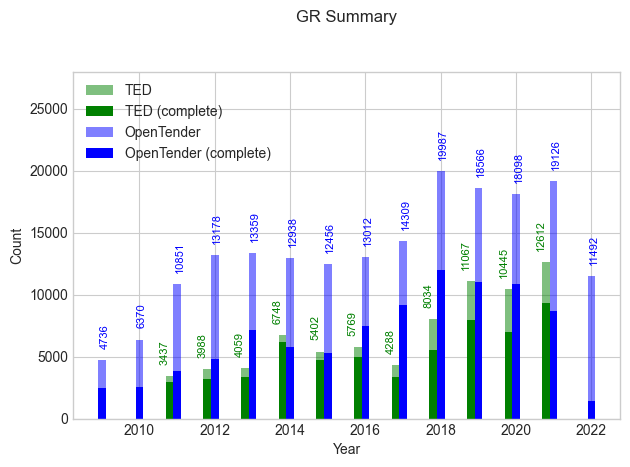

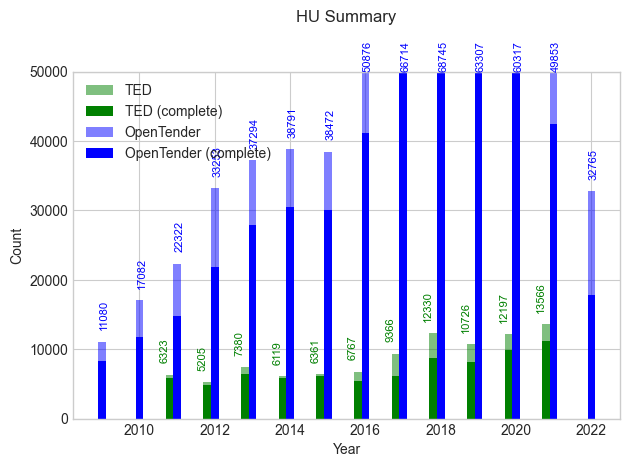

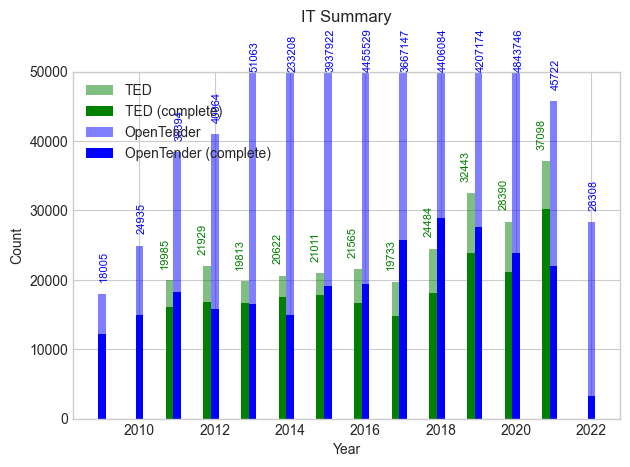

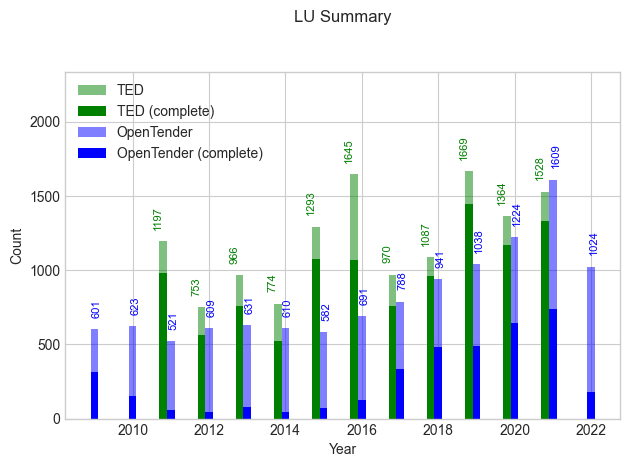

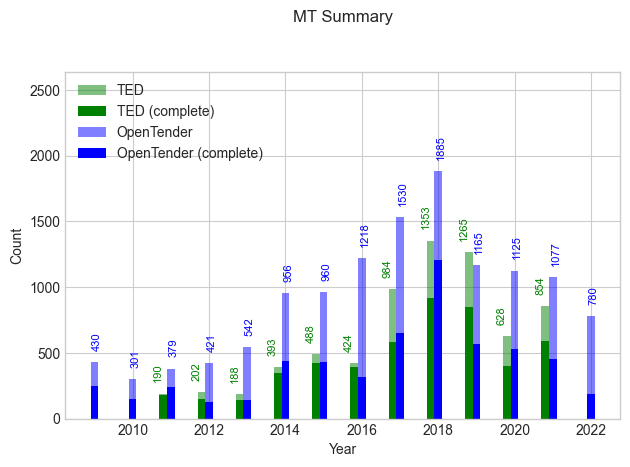

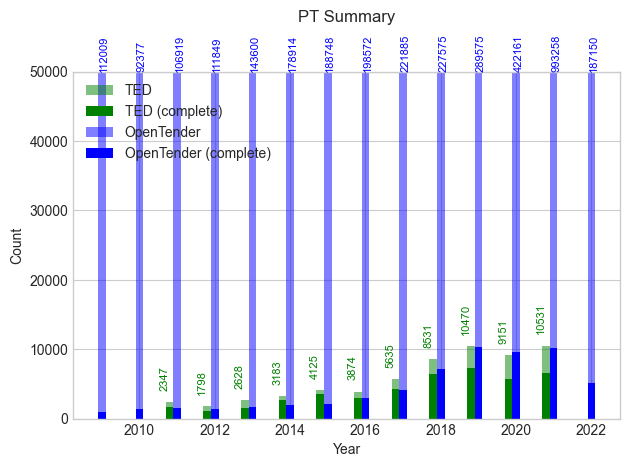

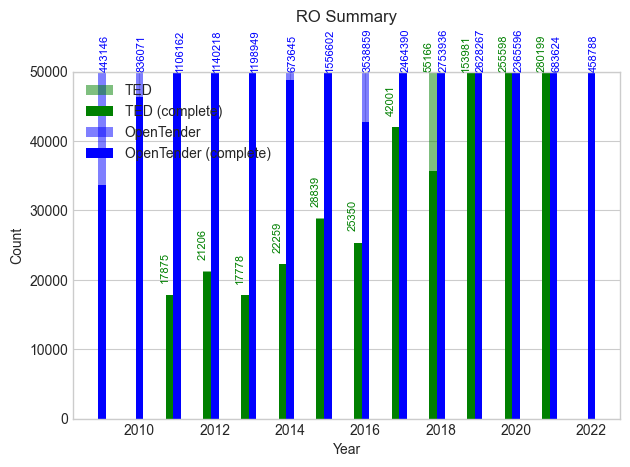

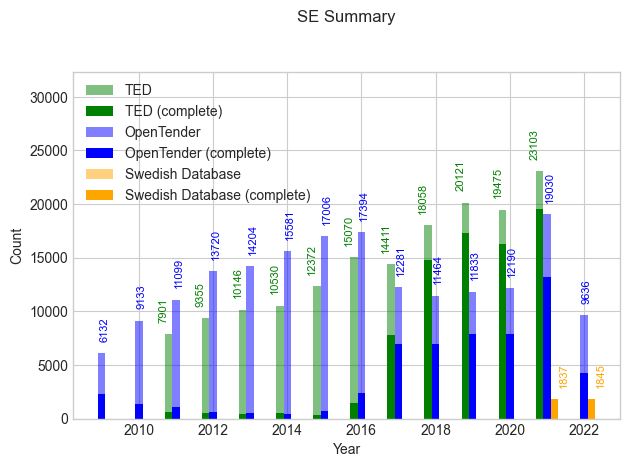

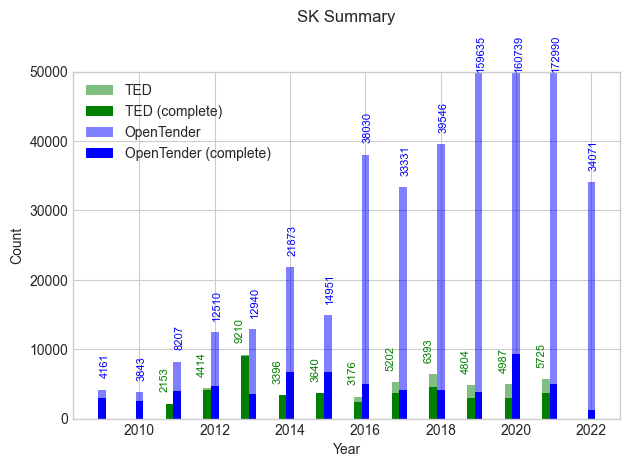

In [9]:

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
width=0.2
# Plotting
for country in country_list:
    fig, ax = plt.subplots()

    data_country=summary[summary['country']==country.lower()]

    data_ted=data_country[data_country['source']=='ted']
    data_opentender=data_country[data_country['source']=='opentender']
    data_swedish=data_country[data_country['source']=='swedish_database']
    
    max_value = min(max(data_country[['count', 'complete_count']].values.flatten())* 1.4,50000)
    ax.set_ylim(0, max_value)
    ax.bar(data_ted['year']-width, data_ted['count'] ,  label='TED',color='green', alpha=0.5, width=0.2, align='center')
    ax.bar(data_ted['year']-width, data_ted['complete_count'] , label='TED (complete)',color='green', width=0.2, align='center')
    for index, row in data_ted.iterrows():
        ax.text(row['year'] - width, min(row['count'] +max_value/30,max_value), str(row['count']), ha='right', va='bottom', rotation='vertical',color='green', fontsize=8)

    ax.bar(data_opentender['year'], data_opentender['count'] ,label='OpenTender',color='blue',alpha=0.5, width=0.2, align='center')
    ax.bar(data_opentender['year'], data_opentender['complete_count'] , label='OpenTender (complete)',color='blue', width=0.2, align='center')
    for index, row in data_opentender.iterrows():
        ax.text(row['year']+width, min(row['count'] +max_value/30,max_value) , str(row['count']), ha='right', va='bottom', rotation='vertical',color='blue', fontsize=8)

    if country=='SE':
        ax.bar(data_swedish['year']+width, data_swedish['count'] ,  label='Swedish Database',color='orange',alpha=0.5, width=0.2, align='center')
        ax.bar(data_swedish['year']+width, data_swedish['complete_count'] , label='Swedish Database (complete)',color='orange', width=0.2, align='center')
        for index, row in data_swedish.iterrows():
            ax.text(row['year'] + 3* width , min(row['count'] +max_value/30,max_value), str(row['count']), ha='right', va='bottom', rotation='vertical',color='orange', fontsize=8)

    # Adding labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(country.upper()+' Summary', y=1.12)
    ax.legend(loc='upper left')
    plt.tight_layout()
    imgname='C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\Completeness_Data\\Images\\'+country+'_comparison.png'
    fig.savefig(imgname, dpi=300)  # Specify the filename and optionally the dpi (dots per inch)
    # Show the plot
    
    plt.show()

C:\Users\afont\AppData\Local\Temp\ipykernel_15004\782673026.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\afont\AppData\Local\Temp\ipykernel_15004\782673026.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_3['country'] = data_last_3['country'].astype('category')
C:\Users\afont\AppData\Local\Temp\ipykernel_15004\782673026.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

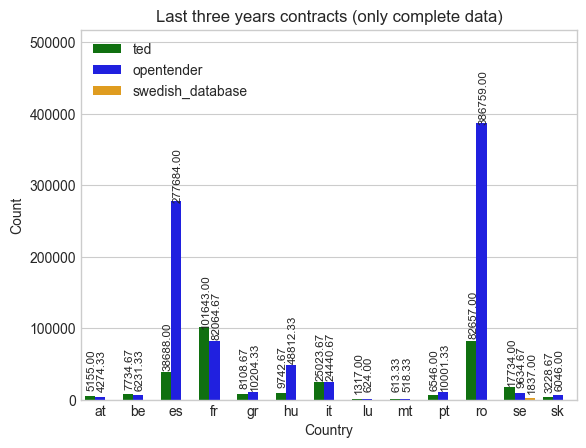

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
width=0.2

fig, ax = plt.subplots()
data_last_3 = summary[(summary['year'] >= 2019) & (summary['year'] <= 2021)]

max_value = max(data_last_3[['complete_count']].values.flatten())
ax.set_ylim(0, max_value * 1.2)


data_last_3['country'] = data_last_3['country'].astype('category')
data_last_3['source'] = data_last_3['source'].astype('category')

desired_order = ['ted', 'opentender', 'swedish_database']
source_colors = {'opentender': 'blue', 'ted': 'green', 'swedish_database':'orange'}

# Use seaborn to create a horizontal grouped bar chart
sns.barplot(y='complete_count', x='country', hue='source', data=data_last_3, ax=ax, orient='x',errorbar=None, dodge=0.2,palette=source_colors,hue_order=desired_order)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    if height != 0:
        ax.annotate(f'{height:.2f}', (x , y + height+max_value/12), ha='center', va='center', xytext=(5, 0), textcoords='offset points', rotation=90, fontsize='small')

# Adding labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Last three years contracts (only complete data)')
ax.legend(loc='upper left')

imgname='C:\\Users\\afont\\OneDrive\\Escritorio\\PROCURE\\Data\\Completeness_Data\\Images\\Last_3_years_comparison.png'
fig.savefig(imgname, dpi=300)  # Specify the filename and optionally the dpi (dots per inch)
# Show the plot
plt.show()